<a href="https://colab.research.google.com/github/Ryo-yuu/Demo/blob/main/Class_3_Logistic_Regression_(college_csv)_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

* Make a classification data set
* Motivating example - Horse or Not?
* Logistic regression to predict probability of being a horse
* Use of probability to classify a row of data as Horse or Not using classification threshold
* Visualization of results for a trained model and one classification threshold in a Confusion Matrix
* Visualization of results for a trained model and all classification thresholds in a ROC curve

Use one of the datasets from Week 1 or 2 and complete this task

In [26]:
# Import Data and Required Packages
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('college.csv')


In [27]:
print(df.head())
print(df.columns)

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

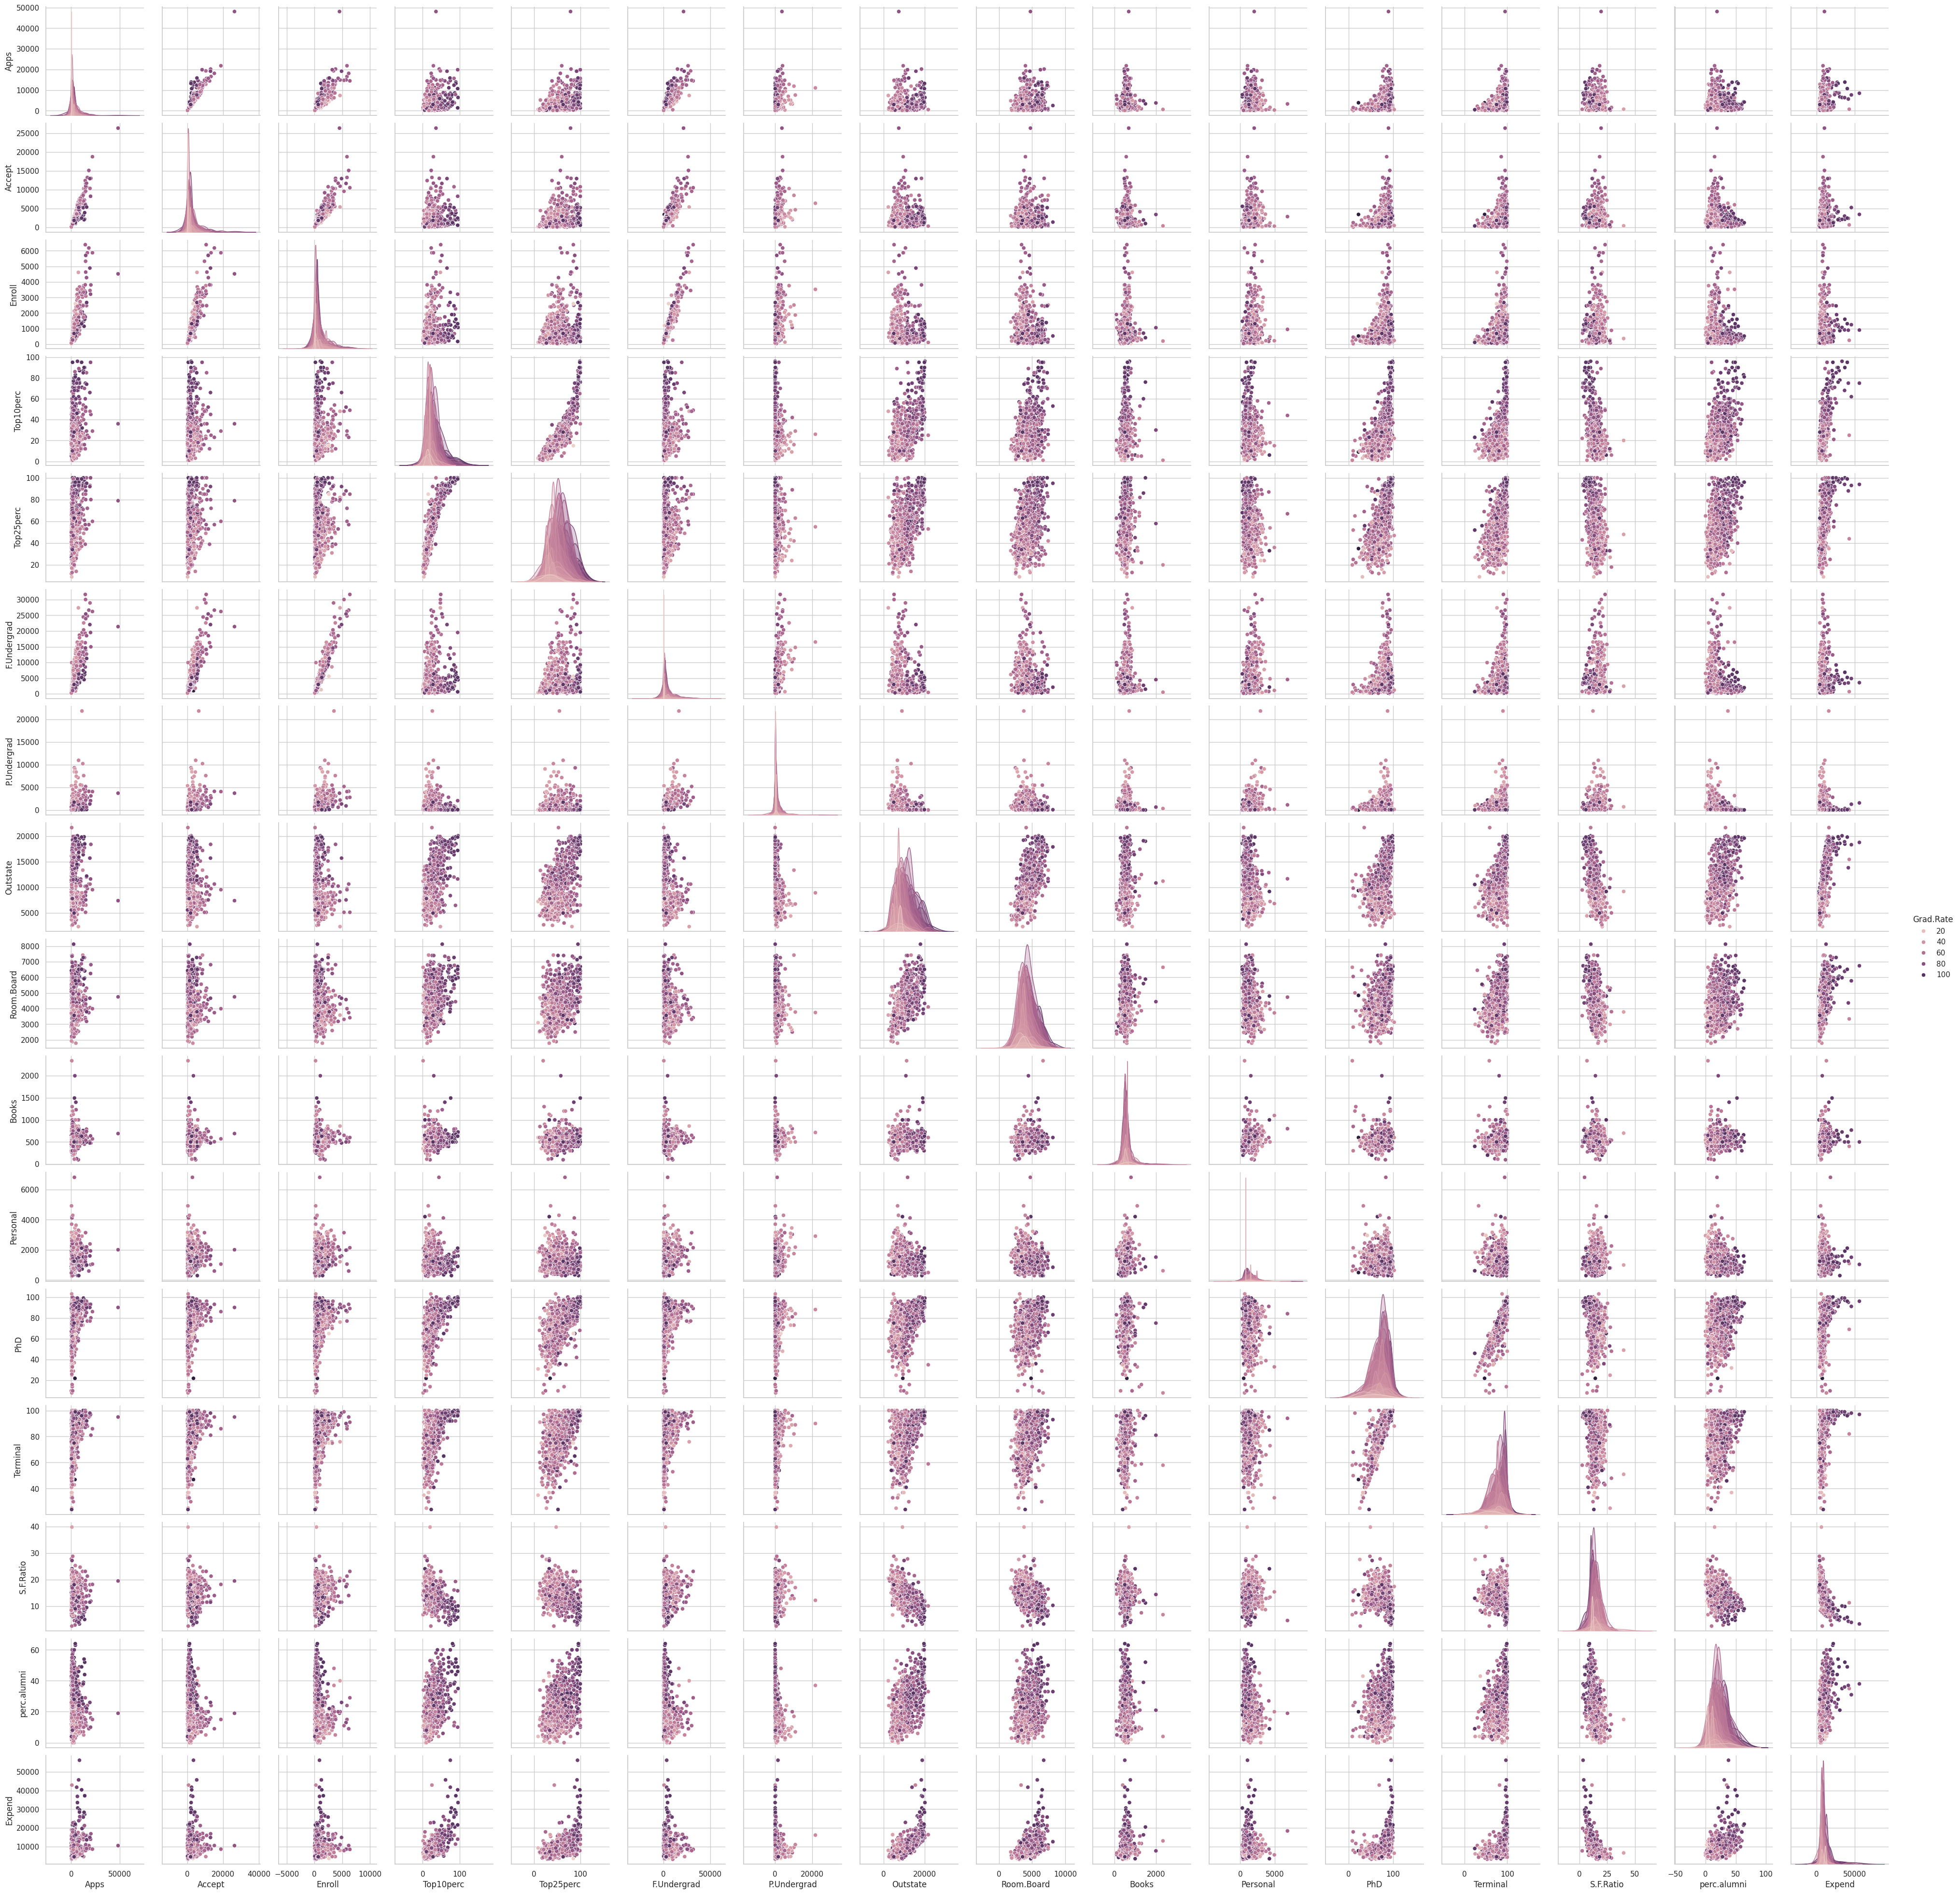

In [28]:
# Combine data into X and labels into y
# Data Visualization
# Plot the synthetic dataset with different colors/markers for each class

sns.pairplot(df, hue='Grad.Rate')
plt.show()

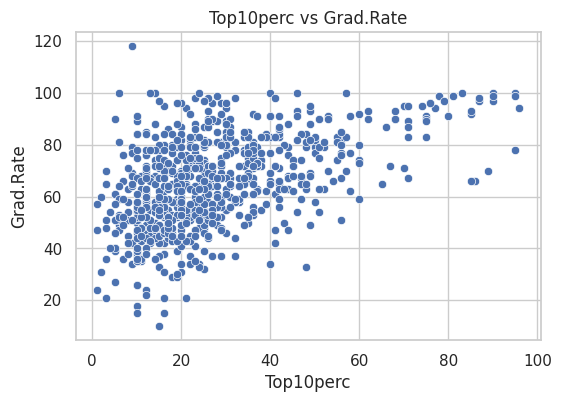

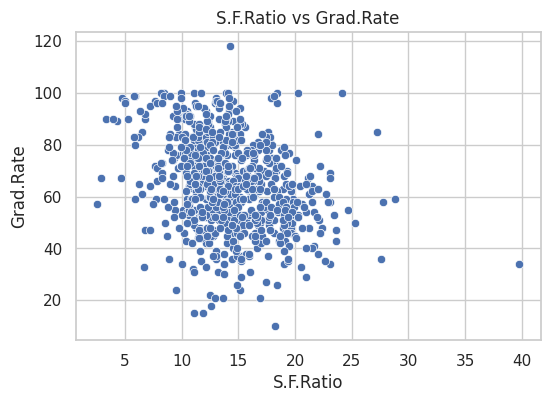

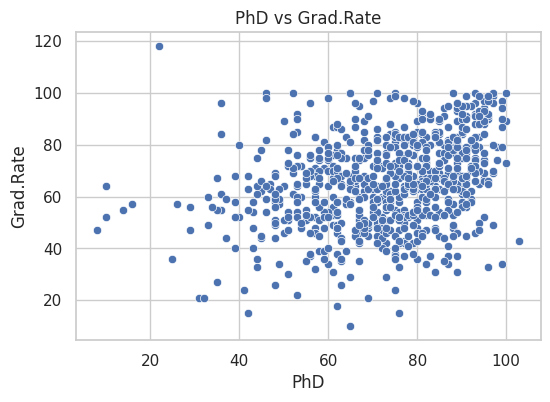

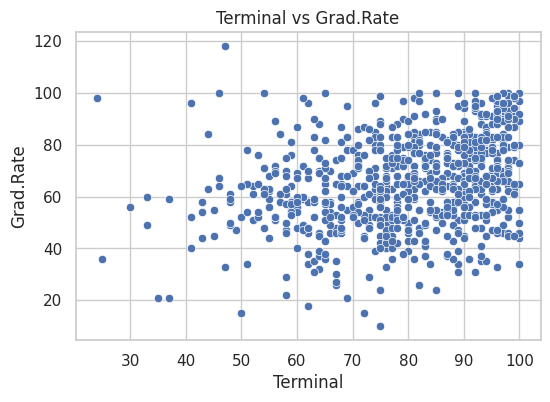

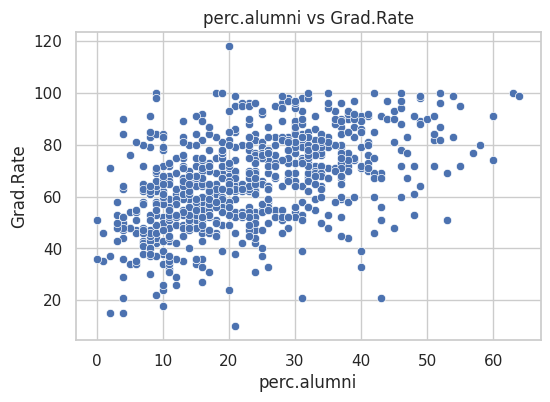

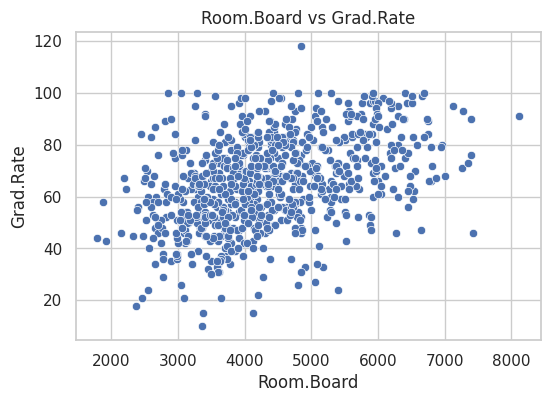

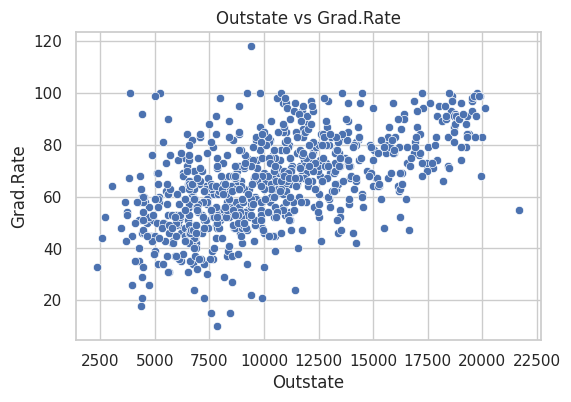

In [29]:
# Combine data into X and labels into y
y = df['Grad.Rate']
x = df[['Private','Top10perc','S.F.Ratio','PhD','Terminal','perc.alumni','Room.Board','Outstate' ]]

# Data Visualization
# Plot the synthetic dataset with different colors/markers for each class

# Set style
sns.set(style="whitegrid")

# Plot scatter plots for each predictor vs Grad.Rate
features = ['Top10perc','S.F.Ratio','PhD','Terminal','perc.alumni','Room.Board','Outstate']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=y)
    plt.title(f'{feature} vs Grad.Rate')
    plt.xlabel(feature)
    plt.ylabel('Grad.Rate')
    plt.show()


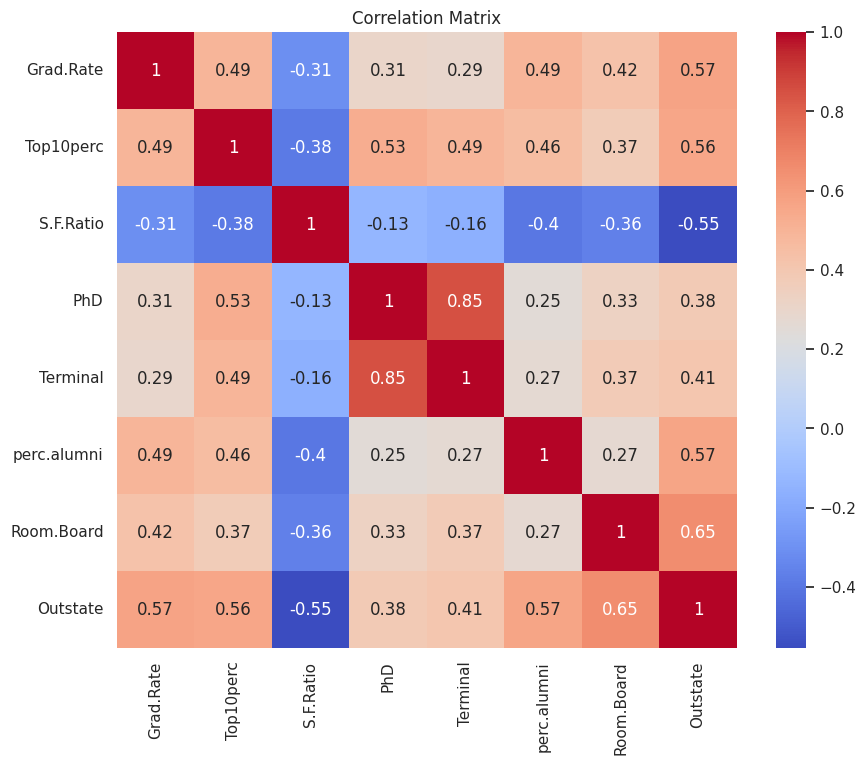

In [16]:
plt.figure(figsize=(10, 8))
corr_matrix = df[['Grad.Rate'] + features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Logistic Regression
# Create a logistic regression model and fit it to the data



In [17]:
# Convert 'Private' to numeric
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

# Create binary classification target
df['HighGrad'] = (df['Grad.Rate'] > 80).astype(int)

# Select features
features = ['Private', 'Top10perc', 'S.F.Ratio', 'PhD', 'Terminal', 'perc.alumni', 'Room.Board', 'Outstate']
X = df[features]
y = df['HighGrad']

# Add a constant term to the predictors
X = sm.add_constant(X) # Now sm is defined

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.380609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               HighGrad   No. Observations:                  777
Model:                          Logit   Df Residuals:                      768
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 May 2025   Pseudo R-squ.:                  0.2463
Time:                        01:09:30   Log-Likelihood:                -295.73
converged:                       True   LL-Null:                       -392.39
Covariance Type:            nonrobust   LLR p-value:                 1.636e-37
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.4645      1.041     -5.247      0.000      -7.506      -3.423
Private         0.6514    

In [ ]:
# Plot Decision Boundary
# Create a grid of points to visualize the decision boundary
# Predict the class labels for each point in the grid
# Plot the decision boundary along with the data points



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


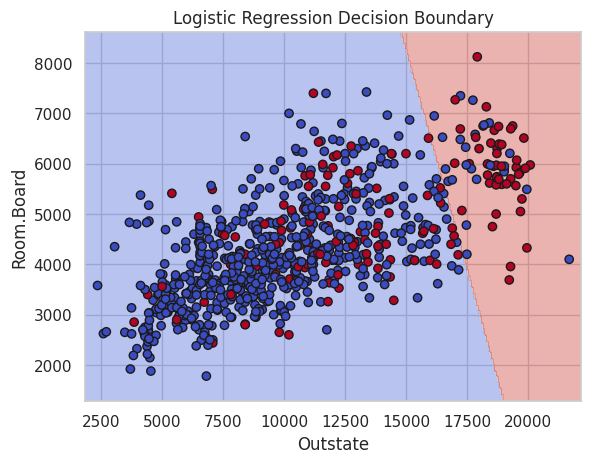

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Use only 2 features for visualization
features = ['Outstate', 'Room.Board']
X = df[features]
y = df['HighGrad']

# Fit logistic regression model from sklearn
clf = LogisticRegression()
clf.fit(X, y)

# Create a grid of points
x_min, x_max = X['Outstate'].min() - 500, X['Outstate'].max() + 500
y_min, y_max = X['Room.Board'].min() - 500, X['Room.Board'].max() + 500
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict on grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X['Outstate'], X['Room.Board'], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel('Outstate')
plt.ylabel('Room.Board')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [20]:
# Classification Threshold
# Choose a classification threshold (e.g., 0.5)
# Predict class labels for the data using the chosen threshold



In [21]:
# Select features and target
features = ['Outstate', 'Room.Board']
X = df[features]
y = df['HighGrad']

# Fit logistic regression model
clf = LogisticRegression()
clf.fit(X, y)

# Get predicted probabilities
y_prob = clf.predict_proba(X)[:, 1]

# Apply threshold
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

# View predictions
results = pd.DataFrame({
    'Outstate': X['Outstate'],
    'Room.Board': X['Room.Board'],
    'Actual': y,
    'Predicted_Prob': y_prob,
    'Predicted_Class': y_pred
})

print(results.head())

   Outstate  Room.Board  Actual  Predicted_Prob  Predicted_Class
0      7440        3300       0        0.070511                0
1     12280        6450       0        0.282812                0
2     11250        3750       0        0.172120                0
3     12960        5450       0        0.288101                0
4      7560        4120       0        0.080747                0


In [ ]:
# Visualization of Classification
# Plot the data points with colors/markers based on predicted class labels


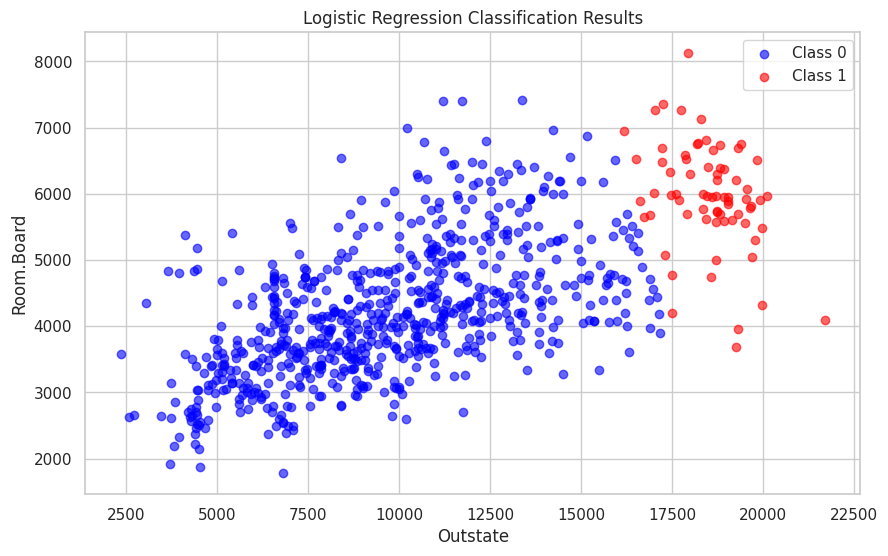

In [25]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(results['Outstate'][results['Predicted_Class'] == 0],
            results['Room.Board'][results['Predicted_Class'] == 0],
            color='blue', label='Class 0', alpha=0.6)

plt.scatter(results['Outstate'][results['Predicted_Class'] == 1],
            results['Room.Board'][results['Predicted_Class'] == 1],
            color='red', label='Class 1', alpha=0.6)

plt.xlabel('Outstate')
plt.ylabel('Room.Board')
plt.title('Logistic Regression Classification Results')
plt.legend()
plt.grid(True)
plt.show()